# Performance Measures
Evaluating a classifier is often significantly trickier than evaluating a regressor, so we
will spend a large part of this chapter on this topic.
This chapter will focus on:
1. Measuring Accuracy Using Cross-Validation
2. Confusion Matrix
3. Precision and Recall
4. The ROC Curve

In [11]:
# dataset
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
data = load_digits()

In [17]:
X = data['data']
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

#### Cross-Validation Score
To simplify the explanation for the case accuracy will not be the best metric,
we make a classifier that classifying whether a number is 5 or not

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)
svm_clf = SVC()
cross_val_score(svm_clf, X_train, y_train_5, cv=5, scoring='accuracy')

array([1.        , 0.98412698, 0.99601594, 1.        , 0.99203187])

In [43]:
sum(y_train_5)/y_train.shape[0]

0.09864757358790771

Almost 99.1% of the dataset is not 5, so maybe the algorithm just predicts 'False' for all the case.

This demonstrates why accuracy is generally not the preferred performance measure
for classifiers, especially when you are dealing with skewed datasets

## Confusion Matrix
A much better way to evaluate the performance of a classifier is to look at the confu‐
sion matrix. The general idea is to count the number of times instances of class

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
y_pre_5 = cross_val_predict(svm_clf, X_train, y_train_5, cv=5)
the_unperfect_pred = confusion_matrix(y_train_5, y_pre_5)
the_unperfect_pred

array([[1132,    1],
       [   6,  118]], dtype=int64)

In [46]:
the_perfect_pred = confusion_matrix(y_train_5, y_train_5)
the_perfect_pred

array([[1133,    0],
       [   0,  124]], dtype=int64)

In [55]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score_perfect = precision_score(y_train_5, y_train_5)
precision_score_perfect

1.0

In [49]:
recall_score_prefect = recall_score(y_train_5, y_train_5)
recall_score_prefect

1.0

In [51]:
unperfect_precision = precision_score(y_train_5, y_pre_5)
unperfect_precision

0.9915966386554622

In [56]:
unperfect_recall = recall_score(y_train_5, y_pre_5)
unperfect_recall

0.9516129032258065

A little bit better for accuracy metrics, where most of the prediction get 99.9 accuracy

In [57]:
f1_perfect = f1_score(y_train_5, y_train_5)
f1_noperfect = f1_score(y_train_5, y_pre_5)
print(f1_perfect)
print(f1_noperfect)

1.0
0.9711934156378601


## The ROC Curve
The receiver operating characteristic (ROC) curve is another common tool used with
binary classifiers.

In [59]:
y_scores = cross_val_predict(svm_clf, X_train, y_train_5, cv=3,
 method="decision_function")

In [60]:
from sklearn.metrics import precision_recall_curve

In [64]:
precision, recall, threshold = precision_recall_curve(y_train_5, y_scores)

In [65]:
import matplotlib.pyplot as plt
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0, 1])

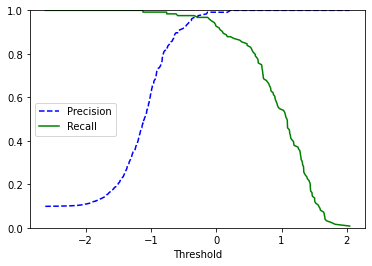

In [66]:
plot_precision_recall_vs_threshold(precision, recall, threshold)

Now you can simply select the threshold value that gives you the best precision/recall
tradeoff for your task. Another way to select a good precision/recall tradeoff is to plot
precision directly against recall

#### ROC curve


In [69]:
from sklearn.metrics import roc_curve, roc_auc_score
roc_auc_score(y_train_5, y_pre_5)

0.9753651453463542

Since the ROC curve is so similar to the precision/recall (or PR)
curve, you may wonder how to decide which one to use. As a rule
of thumb, you should prefer the PR curve whenever the positive
class is rare or when you care more about the false positives than
the false negatives, and the ROC curve otherwise. For example,
looking at the previous ROC curve (and the ROC AUC score), you
may think that the classifier is really good. But this is mostly
because there are few positives (5s) compared to the negatives
(non-5s). In contrast, the PR curve makes it clear that the classifier
has room for improvement (the curve could be closer to the topright corner).

In [73]:
# tpr = True positive rate
# fpr = False positive rate
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [74]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

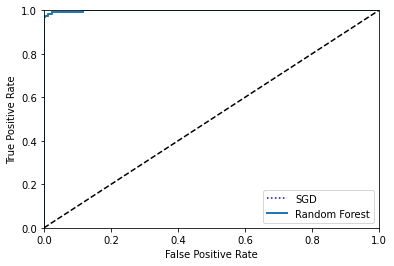

In [75]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr, tpr, "Random Forest")
plt.legend(loc="lower right")
plt.show()

## Multiclass Classification
Whereas binary classifiers distinguish between two classes, multiclass classifiers (also
called multinomial classifiers) can distinguish between more than two classes.

However, there are various strategies that you can use to perform multiclass classification using multiple
binary classifiers. Such as:
1. One Versus All (One Versus the Rest) - OvA:
 * For example: However, there are vari‐
ous strategies that you can use to perform multiclass classification using multiple
binary classifiers.

2. One Versus One (OvO):
    *   train a binary classifier for every pair of digits: one to distinguish 0s and 1s, another to distinguish 0s and 2s, another for 1s and 2s, and so on.  For the MNIST problem, this means training 45 binary classifiers!

Some algorithms (such as Support Vector Machine classifiers) scale poorly with the
size of the training set, so for these algorithms OvO is preferred since it is faster to
train many classifiers on small training sets than training few classifiers on large
training sets. For most binary classification algorithms, however, OvA is preferred.

Scikit-Learn detects when you try to use a binary classification algorithm for a multi‐
class classification task, and it automatically runs OvA (except for SVM classifiers for
which it uses OvO). Let’s try this with the SGDClassifier:

In [85]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)
sgd_clf.predict(X_train[1].reshape(1, -1))

array([5])

That was easy! This code trains the SGDClassifier on the training set using the origi‐
nal target classes from 0 to 9 (y_train), instead of the 5-versus-all target classes
(y_train_5). Then it makes a prediction (a correct one in this case). Under the hood,
Scikit-Learn actually trained 10 binary classifiers, got their decision scores for the
image, and selected the class with the highest score.

In [88]:
decision_score = sgd_clf.decision_function(X_train[1].reshape(1, -1))
decision_score

array([[-2932.67842899, -2201.71813072, -3086.44689328, -4148.51031258,
        -3115.09860294,   832.3174805 , -2158.70633348, -1253.21747054,
        -1937.38364831, -3171.95920615]])

In [90]:
import numpy as np
np.argmax(decision_score)

5

When a classifier is trained, it stores the list of target classes in its
classes_ attribute, ordered by value. In this case, the index of each
class in the classes_ array conveniently matches the class itself
(e.g., the class at index 5 happens to be class 5), but in general you
won’t be so lucky.

If you want to force ScikitLearn to use one-versus-one or one-versus-all, you can use
the OneVsOneClassifier or OneVsRestClassifier classes.

In [92]:
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

In [93]:
ovo_sgd = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_sgd.fit(X_train, y_train)
ovo_sgd.predict(X_train[1].reshape(1, -1))

array([5])

In [100]:
print("number of estimator is ", len(ovo_sgd.estimators_))
ovo_sgd.estimators_

number of estimator is  45


(SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassi

In [101]:
ova_clf = OneVsRestClassifier(SGDClassifier(random_state=42))
ova_clf.fit(X_train, y_train)
ova_clf.predict(X_train[1].reshape(1, -1))

array([5])

In [102]:
print("number of estimator is ", len(ova_clf.estimators_))
ova_clf.estimators_

number of estimator is  10


[SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42),
 SGDClassifier(random_state=42)]

This time Scikit-Learn did not have to run OvA or OvO because Random Forest
classifiers can directly classify instances into multiple classes. You can call
predict_proba() to get the list of probabilities that the classifier assigned to each
instance for each class

In [106]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, y_train)
forest_clf.predict_proba(X_train[1].reshape(1, -1))

array([[0.  , 0.  , 0.  , 0.01, 0.01, 0.95, 0.  , 0.  , 0.01, 0.02]])

In [109]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.92362768, 0.92840095, 0.94749403])

In [110]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.9451074 , 0.94272076, 0.94272076])

You can train a little better with scaler

## Error Analysis
Of course, if this were a real project, you would follow the steps in your Machine
Learning project checklist:
1. Exploring data preparation options
2. trying out multiple models
3. Shortlisting the best ones and fine-tuning their hyperpara-meters using GridSearchCV
4. automating as much as possible


Here, we will assume that you have found a promising model and
you want to find ways to improve it. One way to do this is to analyze the types of
errors it makes.

##### Steps 1: Look at confusion_matrix

In [116]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv = 3)

In [117]:
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[120,   0,   0,   0,   0,   0,   1,   0,   1,   0],
       [  0, 106,   2,   3,   0,   0,   0,   0,  10,   2],
       [  0,   1, 119,   0,   0,   0,   0,   1,   2,   0],
       [  0,   0,   0, 127,   0,   1,   0,   1,   6,   1],
       [  1,   1,   0,   0, 111,   0,   0,   3,   1,   1],
       [  0,   0,   0,   0,   1, 115,   0,   0,   4,   4],
       [  0,   1,   0,   0,   0,   0, 128,   0,   1,   0],
       [  0,   0,   0,   1,   0,   0,   0, 124,   0,   1],
       [  0,   7,   0,   0,   0,   1,   0,   0, 111,   1],
       [  0,   0,   0,   3,   0,   0,   0,   0,   9, 123]], dtype=int64)

That’s a lot of numbers. It’s often more convenient to look at an image representation
of the confusion matrix, using Matplotlib’s matshow() function:

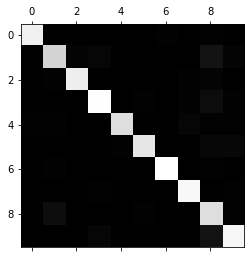

In [121]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

This confusion matrix looks fairly good, since most images are on the main diagonal,
which means that they were classified correctly. Some look slightly darker than the
other digits, which could mean that there are fewer images of other in the dataset or that
the classifier does not perform . In fact, you can verify that both are the case.

In [131]:
# axis = 1, mean we want to count number in y_train data
row_sums = conf_mx.sum(axis=1, keepdims=True)
row_sums

array([[122],
       [123],
       [123],
       [136],
       [118],
       [124],
       [130],
       [126],
       [120],
       [135]], dtype=int64)

In [132]:
sum(y_train==0)

122

In [134]:
norm_conf_mx = conf_mx / row_sums
norm_conf_mx

array([[0.98360656, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00819672, 0.        , 0.00819672, 0.        ],
       [0.        , 0.86178862, 0.01626016, 0.02439024, 0.        ,
        0.        , 0.        , 0.        , 0.08130081, 0.01626016],
       [0.        , 0.00813008, 0.96747967, 0.        , 0.        ,
        0.        , 0.        , 0.00813008, 0.01626016, 0.        ],
       [0.        , 0.        , 0.        , 0.93382353, 0.        ,
        0.00735294, 0.        , 0.00735294, 0.04411765, 0.00735294],
       [0.00847458, 0.00847458, 0.        , 0.        , 0.94067797,
        0.        , 0.        , 0.02542373, 0.00847458, 0.00847458],
       [0.        , 0.        , 0.        , 0.        , 0.00806452,
        0.92741935, 0.        , 0.        , 0.03225806, 0.03225806],
       [0.        , 0.00769231, 0.        , 0.        , 0.        ,
        0.        , 0.98461538, 0.        , 0.00769231, 0.        ],
       [0.        , 0.        , 0.       

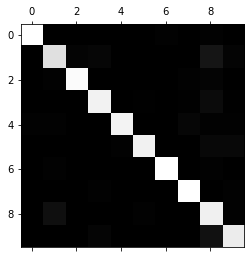

In [135]:
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

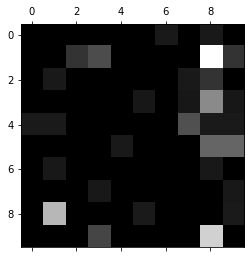

In [136]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

Now you can clearly see the kinds of errors the classifier makes. Remember that rows
represent actual classes, while columns represent predicted classes. The columns for
classes 8 is look like something wrong, which tells you that many images get misclassified as
8s or 9s.

8s and 1s has some mixing predicted

Notice that the errors are not perfectly symmetrical; for
example, there are more 5s misclassified as 9s than the reverse.

Analyzing the confusion matrix can often give you insights on ways to improve your
classifier.
For example,
you could try to gather more training data for these digits. Or you could engineer
new features that would help the classifier—for example, writing an algorithm to
count the number of closed loops (e.g., 8 has two, 6 has one, 5 has none). Or you
could preprocess the images (e.g., using Scikit-Image, Pillow, or OpenCV) to make
some patterns stand out more, such as closed loops.


In [140]:
clf_8, clf_1 = 8, 1
X_88 = X_train[(y_train== 8) & (y_train_pred ==8)]
X_81 = X_train[(y_train== 8) & (y_train_pred ==1)]
X_18 = X_train[(y_train== 1) & (y_train_pred ==8)]
X_11 = X_train[(y_train== 1) & (y_train_pred ==1)]

In [182]:
def plot_digits(X):
    fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(3, 3))
    for idx, ax in enumerate(axs.ravel()):
        if idx < X.shape[0]:
            ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
            ax.axis("off")



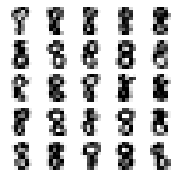

In [183]:
plot_digits(X_88)

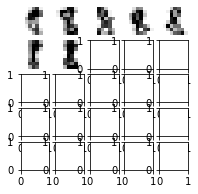

In [184]:
plot_digits(X_81)

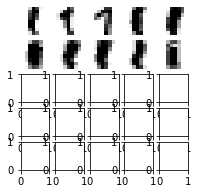

In [185]:
plot_digits(X_18)

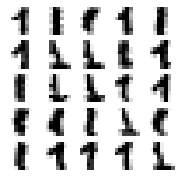

In [186]:
plot_digits(X_11)

In [190]:
np.argwhere([(y_train== 1) & (y_train_pred ==8)])

array([[   0,  360],
       [   0,  433],
       [   0,  623],
       [   0,  787],
       [   0,  826],
       [   0, 1069],
       [   0, 1104],
       [   0, 1117],
       [   0, 1142],
       [   0, 1254]], dtype=int64)

In [192]:
print(y_train[360])
y_train_pred[360]

1


8

 However, most misclassified images seem like obvious errors to us,
and it’s hard to understand why the classifier made the mistakes it did.3 The reason is
that we used a simple SGDClassifier, which is a linear model. All it does is assign a
weight per class to each pixel, and when it sees a new image it just sums up the weigh‐
ted pixel intensities to get a score for each class.

# Multilabel Classification
Until now each instance has always been assigned to just one class. In some cases you
may want your classifier to output multiple classes for each instance. For example,
consider a face-recognition classifier: what should it do if it recognizes several people
on the same picture? Of course it should attach one label per person it recognizes.

Say
the classifier has been trained to recognize three faces, Alice, Bob, and Charlie; then
when it is shown a picture of Alice and Charlie, it should output [1, 0, 1] (meaning
“Alice yes, Bob no, Charlie yes”). Such a classification system that outputs multiple
binary labels is called a multilabel classification system.

In [193]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_ood = (y_train % 2 == 0)
y_multilabel = np.c_[y_train_large, y_train_ood]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [194]:
some_digits = X_train[:2]
knn_clf.predict(some_digits)

A:\huan_shit\Study_Shit\Deep_Learning\Dive_into_Deep_Learning\venv\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([[False,  True],
       [False, False]])

There are many ways to evaluate a multilabel classifier, and selecting the right metric
really depends on your project. For example, one approach is to measure the F1
 score
for each individual label (or any other binary classifier metric discussed earlier), then
simply compute the average score. This code computes the average F1
score across all labels:

In [195]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

A:\huan_shit\Study_Shit\Deep_Learning\Dive_into_Deep_Learning\venv\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
A:\huan_shit\Study_Shit\Deep_Learning\Dive_into_Deep_Learning\venv\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is t

0.9764593207703234

This assumes that all labels are equally important, which may not be the case. In par‐
ticular, if you have many more pictures of Alice than of Bob or Charlie, you may want
to give more weight to the classifier’s score on pictures of Alice. One simple option is
to give each label a weight equal to its support (i.e., the number of instances with that
target label). To do this, simply set average="weighted" in the preceding code

In [199]:
f1_score(y_multilabel, y_train_knn_pred, average="weighted")

0.9786934069111816

## Multioutput Classification
The last type of classification task we are going to discuss here is called multioutputmulticlass classification (or simply multioutput classification). It is simply a generalization of multilabel classification where each label can be multiclass (i.e., it can have
more than two possible values).


To illustrate this, let’s build a system that removes noise from images. It will take as
input a noisy digit image, and it will (hopefully) output a clean digit image, repre‐
sented as an array of pixel intensities, just like the MNIST images. Notice that the
classifier’s output is multilabel (one label per pixel) and each label can have multiple
values (pixel intensity ranges from 0 to 255). It is thus an example of a multioutput
classification system.

In [204]:
noise = np.random.randint(0, 100, X_train.shape)
X_train_mod = X_train + noise
noise = np.random.randint(0, 100,X_test.shape)
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

A:\huan_shit\Study_Shit\Deep_Learning\Dive_into_Deep_Learning\venv\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


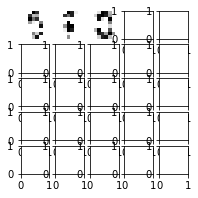

In [210]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict(X_test_mod[:3])
plot_digits(clean_digit)

The line between classification and regression is sometimes blurry,
such as in this example. Arguably, predicting pixel intensity is more
akin to regression than to classification. Moreover, multioutput
systems are not limited to classification tasks; you could even have
a system that outputs multiple labels per instance, including both
class labels and value labels